In [49]:
import pandas as pd
import numpy as np
# Load the data
data = pd.read_csv("Data_input_3.csv")

# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop rows with missing values
data.fillna(method='ffill', inplace=True)  # forward fill
data.dropna(inplace=True)  # drop any remaining NaNs


Date          0
Close/Last    0
COMP          0
NATS          0
MSCI          0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_16280\1510952391.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # forward fill


In [50]:
data['Date'] = pd.to_datetime(data['Date'])

# Tạo các cột phụ để sắp xếp theo năm, tháng, ngày
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Sắp xếp DataFrame theo năm, sau đó tháng, và cuối cùng là ngày
data.sort_values(['Year', 'Month', 'Day'], inplace=True)

# Xóa các cột phụ nếu không cần thiết
data.drop(columns=['Year', 'Month', 'Day'], inplace=True)
data

,Date,Close/Last,COMP,NATS,MSCI
1257,2019-06-03,4170.02,7333.02,835.84,2615.02
1256,2019-06-04,4320.98,7527.12,863.30,2671.61
1255,2019-06-05,4329.21,7575.48,875.85,2693.60
1254,2019-06-06,4375.45,7615.55,881.34,2709.88
1253,2019-06-07,4435.80,7742.10,894.46,2738.40
...,...,...,...,...,...
4,2024-05-23,10495.82,16736.03,1770.08,5016.81
3,2024-05-24,10549.22,16920.79,1751.27,5051.83
2,2024-05-28,10526.85,17019.88,1739.75,5051.64
1,2024-05-29,10396.40,16920.58,1733.33,5014.18


In [51]:
# Tính toán số lượng dòng cho từng phần
total_rows = len(data)
train_size = int(0.8 * total_rows)
val_size = int(0.1 * total_rows)
test_size = total_rows - train_size - val_size  # Đảm bảo rằng tổng số dòng vẫn bằng total_rows

# Chia DataFrame thành các tập huấn luyện, kiểm tra và kiểm định
data_train = data.iloc[:train_size]
data_val = data.iloc[train_size:train_size + val_size]
data_test = data.iloc[train_size + val_size:]

In [52]:
data_test

,Date,Close/Last,COMP,NATS,MSCI
126,2023-11-28,8739.96,14281.76,1610.29,4336.78
125,2023-11-29,8874.27,14258.49,1636.60,4335.93
124,2023-11-30,8850.47,14226.22,1648.98,4352.86
123,2023-12-01,8878.94,14305.03,1672.45,4381.11
122,2023-12-04,8767.82,14185.49,1650.78,4357.47
...,...,...,...,...,...
4,2024-05-23,10495.82,16736.03,1770.08,5016.81
3,2024-05-24,10549.22,16920.79,1751.27,5051.83
2,2024-05-28,10526.85,17019.88,1739.75,5051.64
1,2024-05-29,10396.40,16920.58,1733.33,5014.18


In [53]:
from sklearn.preprocessing import MinMaxScaler

# Chuẩn hóa các cột giá dựa trên tập huấn luyện và áp dụng cho tập kiểm tra và kiểm định
scaler_price = MinMaxScaler(feature_range=(-1, 1))
price_columns = ['Close/Last', 'COMP', 'NATS', 'MSCI']
data_train_copy=data_train[price_columns]
data_train[price_columns] = scaler_price.fit_transform(data_train[price_columns])
data_val[price_columns] = scaler_price.transform(data_val[price_columns])
data_test_copy=data_test[price_columns]
data_test[price_columns] = scaler_price.transform(data_test[price_columns])

# Chuyển đổi các cột pandas thành mảng NumPy
train_data = data_train[price_columns].values
val_data = data_val[price_columns].values
test_data = data_test[price_columns].values

# Hiển thị kích thước của các tập dữ liệu
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

Training data shape: (1006, 4)
Validation data shape: (125, 4)
Test data shape: (127, 4)


C:\Users\DELL\AppData\Local\Temp\ipykernel_16280\3631155638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[price_columns] = scaler_price.fit_transform(data_train[price_columns])
C:\Users\DELL\AppData\Local\Temp\ipykernel_16280\3631155638.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val[price_columns] = scaler_price.transform(data_val[price_columns])
C:\Users\DELL\AppData\Local\Temp\ipykernel_16280\3631155638.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [54]:
# Training data
seq_len = 30
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 0][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 0][i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 0][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

print( X_train.shape, y_train.shape)
print( X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(976, 30, 4) (976,)
(95, 30, 4) (95,)
(97, 30, 4) (97,)


In [55]:
type(X_test)

numpy.ndarray

In [56]:
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.models import Sequential

# model = Sequential([
#     LSTM(256),
#     Dropout(0.3),
#     LSTM(256),
#     Dropout(0.3),
#     Dense(1)
# ])
model = Sequential([
    LSTM(256, return_sequences=True),
    Dropout(0.3),
    LSTM(256),
    Dropout(0.3),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), verbose=1)

# Predicting and reversing normalization
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler_price.inverse_transform(np.concatenate((predicted_stock_price, np.zeros((len(predicted_stock_price), 3))), axis=1))[:,0]

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step - loss: 0.1066 - val_loss: 0.0183
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - loss: 0.0149 - val_loss: 0.0086
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - loss: 0.0102 - val_loss: 0.0068
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - loss: 0.0092 - val_loss: 0.0095
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - loss: 0.0078 - val_loss: 0.0060
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 325ms/step - loss: 0.0076 - val_loss: 0.0071
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 324ms/step - loss: 0.0068 - val_loss: 0.0058
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 339ms/step - loss: 0.0067 - val_loss: 0.0060
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 322ms/step - loss: 0.0064 - val_loss: 0.0055
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - loss: 0.0065 - val_loss: 0.0056
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 323ms/step - loss: 0.0065 - val_loss: 0.0050
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - loss: 0.0

In [57]:
predict = model.predict(X_test[0][np.newaxis, :, :])
predict = scaler_price.inverse_transform(np.concatenate((predict, np.zeros((len(predict), 3))), axis=1))[:,0]
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([9327.00047363])

In [58]:
X_test[0][np.newaxis, :, :]

array([[[0.61698643, 0.61384704, 0.49493688, 0.77186544],
        [0.66310422, 0.60878656, 0.54123081, 0.77118355],
        [0.65493206, 0.60176888, 0.56301412, 0.78476509],
        [0.66470775, 0.61890751, 0.60431091, 0.80742773],
        [0.62655267, 0.59291142, 0.56618132, 0.78846331],
        [0.62012138, 0.60257134, 0.56662121, 0.78575182],
        [0.59878104, 0.58447803, 0.53588176, 0.77201786],
        [0.65374057, 0.62651018, 0.55314301, 0.799566  ],
        [0.66749933, 0.64042376, 0.57689702, 0.81488835],
        [0.73906072, 0.64662593, 0.60865702, 0.82927211],
        [0.76970633, 0.6685706 , 0.61254564, 0.84545283],
        [0.81314929, 0.71218591, 0.64692737, 0.89487744],
        [0.84523019, 0.71818802, 0.60580654, 0.90724763],
        [0.87241809, 0.72957462, 0.64108565, 0.90663795],
        [0.86946168, 0.7494229 , 0.66274579, 0.92293098],
        [0.8830625 , 0.77074125, 0.68132671, 0.94491174],
        [0.82453881, 0.72175014, 0.63673954, 0.8905214 ],
        [0.885

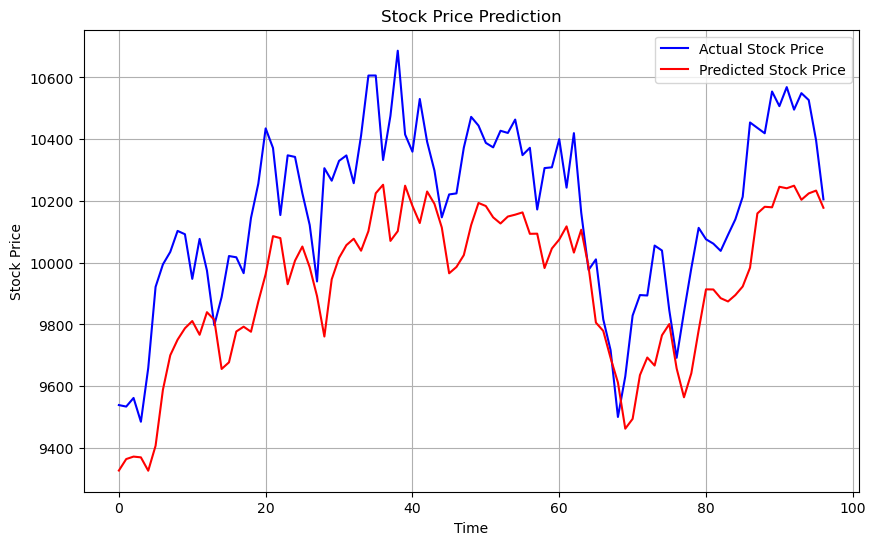

Root Mean Squared Error: 280.90368841534183
Mean Absolute Percentage Error: 0.024485759087624185


In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Get actual prices from the last part of the test set
actual_prices = data_test_copy['Close/Last'].values[seq_len:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate RMSE
rmse = mean_squared_error(actual_prices, predicted_stock_price, squared=False)
print(f"Root Mean Squared Error: {rmse}")

mape = mean_absolute_percentage_error(actual_prices, predicted_stock_price)
print(f"Mean Absolute Percentage Error: {mape}")


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


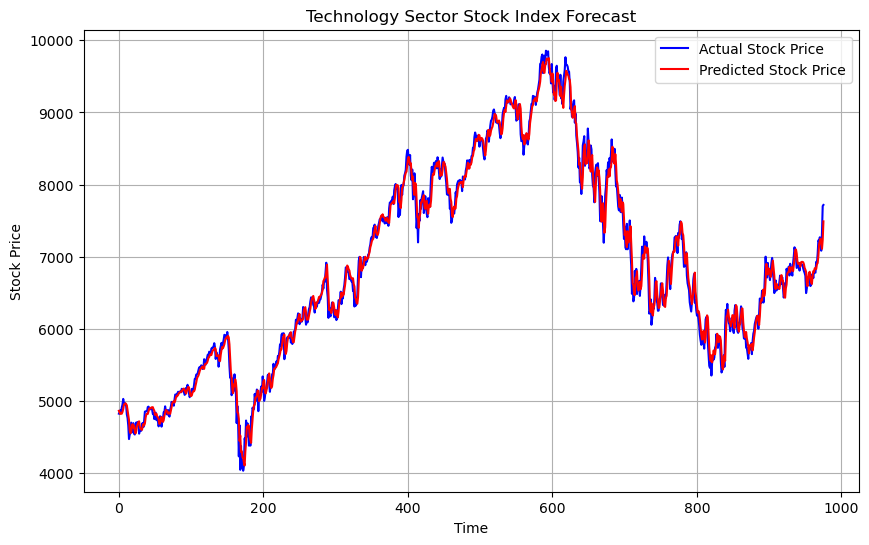

In [60]:
predicted_stock_price_train = model.predict(X_train)
predicted_stock_price_train = scaler_price.inverse_transform(np.concatenate((predicted_stock_price_train, np.zeros((len(predicted_stock_price_train), 3))), axis=1))[:,0]
actual_train_prices = data_train_copy['Close/Last'].values[seq_len:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual_train_prices, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price_train, color='red', label='Predicted Stock Price')
plt.title('Technology Sector Stock Index Forecast')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
model.save('2_layerLSTMEconomic.h5')

In [62]:
import joblib 
# filename = 'predict_model.pkl'
# joblib.dump(model, open(filename, 'wb')) 
  
# # load the model 
# load_model = joblib.load(open(filename, 'rb')) 

In [63]:
joblib.dump(scaler_price, 'scaler_price_economic2lstm.pkl')

['scaler_price_economic2lstm.pkl']

In [64]:
# np.save('X_test12.npy', X_test)
